# KNN

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano,regularizar

[###] All Done                                              


In [4]:
from utilities import score, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_ITER = 10**6
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runAuto = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveAuto = True

### Preprocesamiento

In [8]:
df_targ=targetBooleano(df_targ)
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)
regularizar(df_feat , inplace=True)

,id,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,mm_lluvia_dia,nubosidad_tarde,presion_atmosferica_tarde,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,velocidad_viendo_tarde
0,0.495844,0.736537,0.645996,-2.018030,1.277923,0.270523,7.914307,0.916539,1.269394,0.802215,0.589120,0.834079
1,0.183431,0.317434,-1.382279,-2.018030,-1.806334,-0.675093,0.417359,-1.288420,-2.406972,0.393094,1.544505,1.402051
2,-0.113001,-0.730326,-0.570969,-1.330311,1.326115,-1.147901,-0.281713,1.284033,-2.094694,-0.834272,1.250541,1.629239
3,-1.678190,1.574745,0.848823,-2.018030,1.952605,1.426276,0.320935,1.284033,0.020281,-1.447954,1.030067,1.402051
4,0.930508,-1.149430,-1.179451,-2.018030,-1.806334,-1.673244,-0.281713,-0.920927,-1.257220,-0.834272,0.736103,0.038918
...,...,...,...,...,...,...,...,...,...,...,...,...
102351,-0.264327,-0.101670,-0.570969,-0.298733,0.555051,-1.305504,-0.233501,0.549046,-0.490719,-0.834272,2.352908,2.083617
102352,-1.317418,0.946089,1.457306,-1.462565,0.651434,0.585729,0.345041,0.916539,0.318365,1.211337,0.589120,1.402051
102353,-1.594150,0.736537,1.660133,-2.018030,1.422498,-0.359888,-0.281713,0.916539,-0.064885,-1.447954,-0.366265,-1.892186
102354,0.293898,-1.149430,-0.773796,-1.779974,1.326115,-0.202285,-0.281713,1.284033,-2.052110,-0.629711,1.177050,0.606890


In [9]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           102356 non-null  float64
 1   direccion_viento_tarde       102356 non-null  float64
 2   direccion_viento_temprano    102356 non-null  float64
 3   horas_de_sol                 102356 non-null  float64
 4   humedad_tarde                102356 non-null  float64
 5   humedad_temprano             102356 non-null  float64
 6   mm_lluvia_dia                102356 non-null  float64
 7   nubosidad_tarde              102356 non-null  float64
 8   presion_atmosferica_tarde    102356 non-null  float64
 9   rafaga_viento_max_direccion  102356 non-null  float64
 10  rafaga_viento_max_velocidad  102356 non-null  float64
 11  velocidad_viendo_tarde       102356 non-null  float64
dtypes: float64(12)
memory usage: 9.4 MB


In [10]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ )
train_targ = train_targ.llovieron_hamburguesas_al_dia_siguiente
val_targ = val_targ.llovieron_hamburguesas_al_dia_siguiente

## Entrenamiento

### Auto

In [11]:
if (runAuto):
    knn_auto = KNeighborsClassifier()
    params = {
        'weights': ['uniform','distance'],
        'n_neighbors': np.arange(5,200,5)
    }
    
    knn_auto_grid = HalvingGridSearchCV(
        knn_auto,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1,
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveAuto):
        dump(knn_auto_grid, 'models/KNN/knn_auto_grid.sk')
        dump(knn_auto_grid.best_estimator_, 'models/KNN/knn_auto.sk')
else:
    # Cargar
    knn_auto_grid = load('models/KNN/knn_auto_grid.sk')

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 3411
max_resources_: 92120
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 78
n_resources: 3411
Fitting 5 folds for each of 78 candidates, totalling 390 fits
----------
iter: 1
n_candidates: 26
n_resources: 10233
Fitting 5 folds for each of 26 candidates, totalling 130 fits
----------
iter: 2
n_candidates: 9
n_resources: 30699
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 92097
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [12]:
print(f"Best score: {knn_auto_grid.best_score_}")
print(f"Best params {knn_auto_grid.best_params_}")

Best score: 0.8641528292194023
Best params {'n_neighbors': 155, 'weights': 'distance'}


In [13]:
knn_auto = knn_auto_grid.best_estimator_

AUC-ROC: 0.6780400344245051
ACCURACY: 0.8357756936303243
PRESICION: 0.7560975609756098
RECALL: 0.3925764192139738
CONFUSION MATRIX
CPU times: user 28.9 s, sys: 78.6 ms, total: 28.9 s
Wall time: 28.9 s


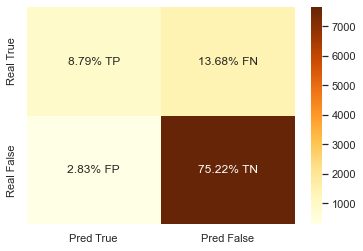

In [14]:
%%time
pred = knn_auto.predict(val_feat)
prob = knn_auto.predict_proba(val_feat)
score(val_targ,pred, prob)